# Map-driven analysis

Another way to use **galpynostatic** is to perform analysis with the map, by determining the fundamental parameters involved with another technique (experimental, computational, etc).

First, we import the libraries that we will use throughout this example.

In [1]:
import galpynostatic
import matplotlib.pyplot as plt
import numpy as np

## Compare materials

We can use the map to predict the maximum SOC value of different materials and using it as a figure of merit to compare them.

Let us assume that we have two different materials (A and B) with the same particle size but different properties in the diffusion coefficient and in the kinetic rate constant. We want to know if they are good candidates for 15 minutes loading.

In [2]:
d = 0.001

materials = {
    "A": {"dcoeff": 3.7e-9, "k0": 2.03e-7},
    "B": {"dcoeff": 1.17e-11, "k0": 1.14e-6},
}

C_rate = np.array([[4.0]])

We now have all the information to describe the system in the model.

In [3]:
greg = galpynostatic.model.GalvanostaticRegressor("spherical", d, 3)

for m in ("A", "B"):
    greg.dcoeff_ = materials[m]["dcoeff"]
    greg.k0_ = materials[m]["k0"]
    
    soc_max = greg.predict(C_rate)
    
    print(f"material {m} has a maximum SOC value of {soc_max[0]:.2f}")

material A has a maximum SOC value of 0.87
material B has a maximum SOC value of 0.02


Here we see that material A retains 87% of its capacity when it is loaded in 15 minutes while material B only retain the 2%. Then, material A is a good candidate for 15 minutes charging but material B is not.

## Map visualization

Next, we can see where the materials are located in the map.

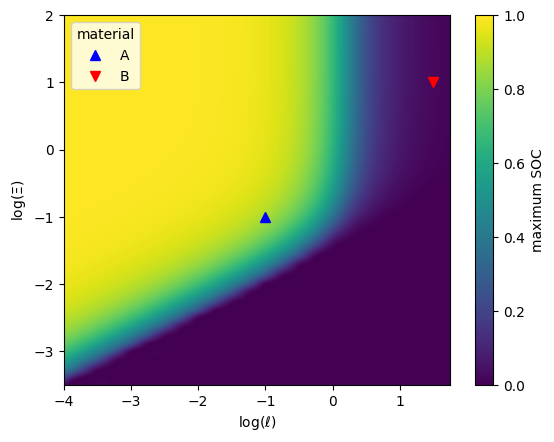

In [4]:
fig, ax = plt.subplots()

greg = galpynostatic.model.GalvanostaticRegressor("spherical", d, 3)
ax = greg.plot.render_map(ax=ax)

for m, marker, color in zip(["A", "B"], ["^", "v"], ["blue", "red"]):
    greg.dcoeff_ = materials[m]["dcoeff"]
    greg.k0_ = materials[m]["k0"]
    
    greg.plot.in_render_map(
        C_rate, 
        ax=ax, 
        marker=marker, 
        markersize=7,
        linestyle="",
        color=color,
        label=m,
    )

ax.legend(title="material")
plt.show()